In [25]:
import pandas as pd
import numpy as np 
from pathlib import Path
import os
import sys

In [2]:
data_path = "dataset"
sessions = ["D1_1", "D1_2"]

bvp_cols = ['id', 'BVP', 'time']
eda_cols = ['id', 'EDA', 'time']
hr_cols = ['id', 'HR', 'time']
temp_cols = ['id', 'TEMP', 'time']
emotions = []

In [14]:
df = pd.read_csv(data_path + "/D1_1/ID_1/round_1/phase1/response.csv")
print(df.iloc[:,5:])
print(df.columns[5:])
df1 = pd.DataFrame(columns=df.columns[5:], data=df.iloc[:,5:])
df1

   upset  hostile  alert  ashamed  inspired  nervous  determined  attentive  \
0      1        1      2        1         2        2           3          3   

   afraid  active  frustrated  
0       1       2           1  
Index(['upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous',
       'determined', 'attentive', 'afraid', 'active', 'frustrated'],
      dtype='object')


,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,frustrated
0,1,1,2,1,2,2,3,3,1,2,1


In [130]:
import pandas as pd
import os
import numpy as np
participants = [f'ID_{i}' for i in range(1,9)]
participants.extend([f'ID_{i}' for i in range(1,7)])
# set up the data directories
data_folder1 = "dataset/D1_1"
data_folder2 = "dataset/D1_2"
# get a list of all the csv files in the directories
csv_files = []
for folder in [data_folder1, data_folder2]:
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".csv"):
                 csv_files.append(os.path.join(root, file))
print(csv_files)
# create an empty dataframe with the required columns
df = pd.DataFrame(columns=['Participant', 'Round', 'Phase', 'BVP', 'EDA', 'HR', 'TEMP', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'determined', 'attentive', 'afraid', 'active', 'frustrated'])

# loop through each participant, round, and phase, and read the corresponding csv files to extract the required metrics
for participant_id, participant in enumerate(participants):
    for round in range(1,5):
        for phase in range(1,4):
            # create a temporary dataframe to hold the metrics for this participant, round, and phase
            temp_df = pd.DataFrame(columns=['BVP', 'EDA', 'HR', 'TEMP'])
            
            for biosignal in ['BVP', 'EDA', 'HR', 'TEMP', 'response']:
                for file in csv_files:
                    if f"{participant}" in file and f"round_{round}" in file and f"phase{phase}" in file and file.endswith(biosignal + ".csv"):
                        bio_signal_file = pd.read_csv(file)
                        if biosignal=='response':
                            temp_df_response = pd.DataFrame(columns=bio_signal_file.columns[5:], data=bio_signal_file.iloc[:,5:])
                            temp_df = pd.concat([temp_df, temp_df_response], axis=1)
                        else:
                            temp_df[biosignal] = bio_signal_file.loc[:, biosignal]
                    

            # # loop through each csv file and extract the metrics for this participant, round, and phase
            # for file in csv_files:
            #     print('file:', file)
            #     break
            #     if f"ID_{participant}" in file and f"round_{round}" in file and f"phase{phase}" in file:
            #         metrics = pd.read_csv(file)
            #         temp_df = pd.concat([temp_df, metrics])
            #         print('metrics', metrics)
            #         print('temp_df', temp_df)
            # break
            new_df = pd.concat([pd.DataFrame(temp_df.iloc[:, 0:4].mean()).T,
                                temp_df.iloc[0,4:].to_frame().T
                                ], axis=1)
            # calculate the mean of each metric for this participant, round, and phase
            # bvp_mean = temp_df['BVP'].mean(skipna=True)
            # eda_mean = temp_df['EDA'].mean(skipna=True)
            # hr_mean = temp_df['HR'].mean(skipna=True)
            # temp_mean = temp_df['TEMP'].mean(skipna=True)
            # print('participant', participant)
            # print('round', round)
            # print('phase', phase)
            # print('bvp_mean', bvp_mean)
            # print('eda_mean', eda_mean)
            # print('hr_mean', hr_mean)
            # print('temp_mean', temp_mean)
            # add the mean metrics to the dataframe
            # final_df = pd.DataFrame.from_dict({'Participant': [f'ID_{participant_id}'],
            #                 'Round': [f'round_{round}'],
            #                 'Phase': [f'phase{phase}'],
            #                 'BVP': [bvp_mean],
            #                 'EDA': [eda_mean],
            #                 'HR': [hr_mean],
            #                 'TEMP': [temp_mean]})
            # df_concat = pd.concat([final_df, pd.DataFrame(temp_df.iloc[0,4:]).T], ignore_index=False, axis=1)
            print(df.append(new_df), index=['Participant', 'Round', 'Phase', 'BVP', 'EDA', 'HR', 'TEMP', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'determined', 'attentive', 'afraid', 'active', 'frustrated'])
            print(new_df)
            sys.exit()

# print the resulting dataframe
print(df)


['dataset/D1_1/ID_2/round_4/phase2/BVP.csv', 'dataset/D1_1/ID_2/round_4/phase2/HR.csv', 'dataset/D1_1/ID_2/round_4/phase2/response.csv', 'dataset/D1_1/ID_2/round_4/phase2/EDA.csv', 'dataset/D1_1/ID_2/round_4/phase2/TEMP.csv', 'dataset/D1_1/ID_2/round_4/phase3/BVP.csv', 'dataset/D1_1/ID_2/round_4/phase3/HR.csv', 'dataset/D1_1/ID_2/round_4/phase3/response.csv', 'dataset/D1_1/ID_2/round_4/phase3/EDA.csv', 'dataset/D1_1/ID_2/round_4/phase3/TEMP.csv', 'dataset/D1_1/ID_2/round_4/phase1/BVP.csv', 'dataset/D1_1/ID_2/round_4/phase1/HR.csv', 'dataset/D1_1/ID_2/round_4/phase1/response.csv', 'dataset/D1_1/ID_2/round_4/phase1/EDA.csv', 'dataset/D1_1/ID_2/round_4/phase1/TEMP.csv', 'dataset/D1_1/ID_2/round_2/phase2/BVP.csv', 'dataset/D1_1/ID_2/round_2/phase2/HR.csv', 'dataset/D1_1/ID_2/round_2/phase2/response.csv', 'dataset/D1_1/ID_2/round_2/phase2/EDA.csv', 'dataset/D1_1/ID_2/round_2/phase2/TEMP.csv', 'dataset/D1_1/ID_2/round_2/phase3/BVP.csv', 'dataset/D1_1/ID_2/round_2/phase3/HR.csv', 'dataset/D1_

/tmp/ipykernel_6088/3192247052.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(df.append(new_df), index=['Participant', 'Round', 'Phase', 'BVP', 'EDA', 'HR', 'TEMP', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'determined', 'attentive', 'afraid', 'active', 'frustrated'])


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

Unsupervised learning can be used to explore patterns and relationships within your data without having any prior knowledge about the outcomes. Since you have biosignal measurements for participants across different rounds and phases, clustering and dimensionality reduction techniques can help you discover patterns and visualize your data.

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

/home/simonl/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


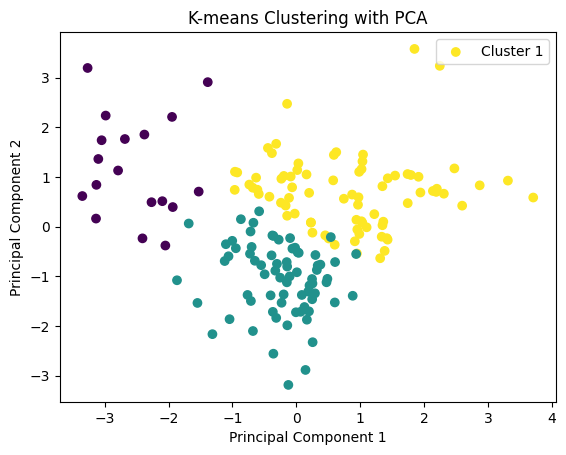

Mean Squared Error: 1.17
R-squared: 0.63


In [22]:
# Encoding categorical columns
le = LabelEncoder()
df['Participant'] = le.fit_transform(df['Participant'])
df['Round'] = le.fit_transform(df['Round'])
df['Phase'] = le.fit_transform(df['Phase'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('frustrated', axis=1))

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters based on domain knowledge or using the elbow method
clusters = kmeans.fit_predict(scaled_data)

# Principal Component Analysis
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Visualizing the clusters in 2D using PCA components
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])  # add legend
plt.show()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['frustrated'], test_size=0.2, random_state=42)

# Training a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predicting the frustration scores for the testing data
y_pred = regressor.predict(X_test)

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

(array([[54., 24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [78.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [78.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [78.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28., 26., 20.,  2.,  2.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  4., 27., 31., 16.],
        [ 0.,  0.,  0., 78.,  0.,  0.,  0.,  0.,  0.,  0.],
        [78.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([-0.71345884,  8.68601871, 18.08549625, 27.4849738 , 36.88445134,
        46.28392889, 55.68340643, 65.08288398, 74.48236152, 83.88183907,
        93.28131661]),
 <a list of 8 BarContainer objects>)

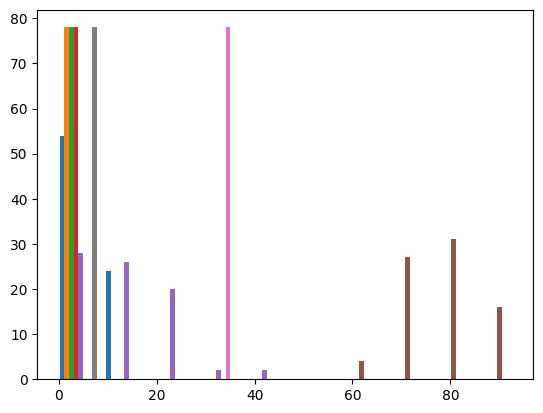

In [19]:
plt.hist(df[clusters==2])

In [12]:
clusters

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1], dtype=int32)

Here we encoded the categorical columns and scaled the data. We then applied K-means clustering and PCA for dimensionality reduction. 

We can now incorporate the frustration survey scores into our analysis. We will consider the frustration score as a target variable, thus we will be able to perform supervised learning to predict a participant's frustration level based on his biosignals. 

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Encoding categorical columns
le = LabelEncoder()
df['Participant'] = le.fit_transform(df['Participant'])
df['Round'] = le.fit_transform(df['Round'])
df['Phase'] = le.fit_transform(df['Phase'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('frustrated', axis=1))

# Prepare target variable
y = df['frustrated']

# Defining regression models
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.1)),
    ('Support Vector Regression', SVR(kernel='linear', C=1)),
    ('Random Forest Regression', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting Regression', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Setting up k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model using cross-validation
for name, model in models:
    cv_results = cross_val_score(model, scaled_data, y, cv=kfold, scoring='neg_mean_squared_error')
    mse = -np.mean(cv_results)
    print(f"{name}: Mean Squared Error = {mse:.2f}")


Linear Regression: Mean Squared Error = 3.74
Ridge Regression: Mean Squared Error = 3.74
Lasso Regression: Mean Squared Error = 3.74
Support Vector Regression: Mean Squared Error = 4.00
Random Forest Regression: Mean Squared Error = 1.04
Gradient Boosting Regression: Mean Squared Error = 1.18


## With PCA

To gain more insight into the principal components and the clusters, I will:

    1. Calculate the explained variance ratio for each principal component.
    2. Examine the principal components' loadings to understand which features contribute the most to each component.
    3. Label data points with the highest and lowest frustration scores and visualize them on the PCA scatter plot.

/home/simonl/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Explained variance ratio for PC1: 0.24
Explained variance ratio for PC2: 0.20
                  PC1       PC2
Participant -0.399116  0.343356
Round       -0.366744 -0.610966
Phase        0.112785 -0.038477
BVP         -0.083307 -0.523694
EDA          0.614506  0.106538
HR           0.247039  0.133681
TEMP         0.497894 -0.451520


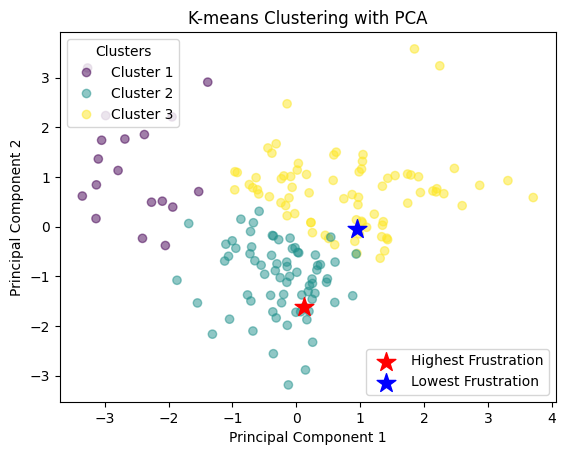

NameError: name 'LinearRegression' is not defined

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Encoding categorical columns
le = LabelEncoder()
df['Participant'] = le.fit_transform(df['Participant'])
df['Round'] = le.fit_transform(df['Round'])
df['Phase'] = le.fit_transform(df['Phase'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('frustrated', axis=1))

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Principal Component Analysis
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for PC1: {explained_variance_ratio[0]:.2f}")
print(f"Explained variance ratio for PC2: {explained_variance_ratio[1]:.2f}")

# Examine the principal components' loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df.drop('frustrated', axis=1).columns)
print(loadings)

# Visualizing the clusters in 2D using PCA components
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# Create a legend for each cluster
cluster_colors = scatter.legend_elements()[0]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
legend1 = plt.legend(cluster_colors, cluster_labels, loc="upper left", title="Clusters")

# Label data points with the highest and lowest frustration scores
highest_frustration = np.argmax(df['frustrated'])
lowest_frustration = np.argmin(df['frustrated'])

scatter_highest = plt.scatter(principal_components[highest_frustration, 0], principal_components[highest_frustration, 1], c='red', marker='*', s=200, label='Highest Frustration')
scatter_lowest = plt.scatter(principal_components[lowest_frustration, 0], principal_components[lowest_frustration, 1], c='blue', marker='*', s=200, label='Lowest Frustration')

# Add the legends to the plot
plt.gca().add_artist(legend1)
plt.legend(handles=[scatter_highest, scatter_lowest], loc="lower right")

# Other plot settings remain unchanged
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA')
plt.show()
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principal_components, df['frustrated'], test_size=0.2, random_state=42)

# Training a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the frustration scores for the testing data
y_pred = regressor.predict(X_test)

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

In [28]:
df[df['frustrated'] >= 4]

,Participant,Round,Phase,BVP,EDA,HR,TEMP,frustrated
10,0,3,1,-0.104468,6.160267,72.443344,35.136148,5.0
13,1,0,1,0.043539,13.716466,70.884934,33.491235,4.0
16,1,1,1,-0.022683,9.158423,69.948595,34.540696,6.0
19,1,2,1,0.574730,8.173028,72.416645,35.185751,4.0
22,1,3,1,0.000828,7.653947,73.781551,35.234448,8.0
23,1,3,2,0.463590,8.140371,68.412484,35.165254,4.0
25,6,0,1,0.060906,5.152041,93.281317,34.200681,4.0
52,8,1,1,0.120212,17.742094,73.719836,35.554901,5.0
55,8,2,1,0.012698,6.243491,71.969286,35.278254,4.0
58,8,3,1,0.175843,9.036804,80.832937,35.485053,8.0


In [14]:
# Sort the loadings of each principal component by their absolute values
sorted_loadings_pc1 = loadings['PC1'].abs().sort_values(ascending=False)
sorted_loadings_pc2 = loadings['PC2'].abs().sort_values(ascending=False)

print("Top contributing features for PC1:")
print(sorted_loadings_pc1.head())

print("\nTop contributing features for PC2:")
print(sorted_loadings_pc2.head())

Top contributing features for PC1:
EDA            0.614506
TEMP           0.497894
Participant    0.399116
Round          0.366744
HR             0.247039
Name: PC1, dtype: float64

Top contributing features for PC2:
Round          0.610966
BVP            0.523694
TEMP           0.451520
Participant    0.343356
HR             0.133681
Name: PC2, dtype: float64


## With ICA

/home/simonl/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/simonl/.local/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


                  IC1       IC2
Participant  0.030159  0.012153
Round        0.005914 -0.044822
Phase       -0.007145  0.000104
BVP         -0.007713 -0.033443
EDA         -0.031490  0.019675
HR          -0.010522  0.013400
TEMP        -0.038169 -0.016562


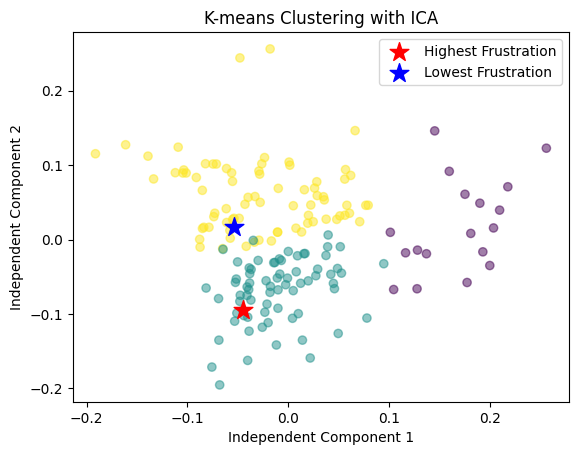

Mean Squared Error: 4.35
R-squared: -0.37


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Encoding categorical columns
le = LabelEncoder()
df['Participant'] = le.fit_transform(df['Participant'])
df['Round'] = le.fit_transform(df['Round'])
df['Phase'] = le.fit_transform(df['Phase'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('frustrated', axis=1))

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Independent Component Analysis
ica = FastICA(n_components=2, algorithm='parallel', max_iter=1000)
independent_components = ica.fit_transform(scaled_data)

# # Calculate the explained variance ratio
# explained_variance_ratio = pca.explained_variance_ratio_
# print(f"Explained variance ratio for PC1: {explained_variance_ratio[0]:.2f}")
# print(f"Explained variance ratio for PC2: {explained_variance_ratio[1]:.2f}")

# Examine the Independent components' loadings
loadings = pd.DataFrame(ica.components_.T, columns=['IC1', 'IC2'], index=df.drop('frustrated', axis=1).columns)
print(loadings)

# Visualizing the clusters in 2D using ICA components
plt.scatter(independent_components[:, 0], independent_components[:, 1], c=clusters, cmap='viridis', alpha=0.5)

# Label data points with the highest and lowest frustration scores
highest_frustration = np.argmax(df['frustrated'])
lowest_frustration = np.argmin(df['frustrated'])

plt.scatter(independent_components[highest_frustration, 0], independent_components[highest_frustration, 1], c='red', marker='*', s=200, label='Highest Frustration')
plt.scatter(independent_components[lowest_frustration, 0], independent_components[lowest_frustration, 1], c='blue', marker='*', s=200, label='Lowest Frustration')

plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('K-means Clustering with ICA')
plt.legend()
plt.show()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_components, df['frustrated'], test_size=0.2, random_state=42)

# Training a Linear Regression model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Predicting the frustration scores for the testing data
y_pred = regressor.predict(X_test)

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

EDA, HR, TEMP and BVP + Emotions

1. Data preprocessing and cleaning
2. Feature extraction <- Mean 
3. Dataset combining the features + self-reported emotion scores. Row per participant-phase and columns for the features and emotion scores.
4. Model Selection -> split dataset, use SVM, Random Forest etc... To try to predict the emotions.
3. Dimensionality reduction (NMF, PCA, ICA, AA etc...)
4. CLustering (K-means) <- potentially identifying patterns or relationships between biosignals and emotions
5. Visualization
6. Interpretation

We could explore relationships between biosignals and emotions experienced during different phases of the experiment. These findings can be useful for applications such as emotion recognition, _mental health monitoring_, and stress management. 

## NMF to perform regression

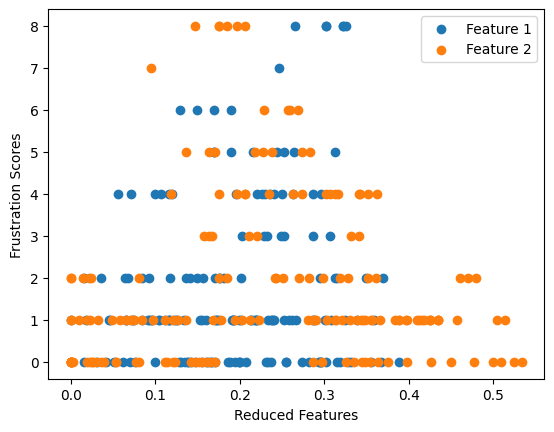

Mean Squared Error: 1.96
R-squared: 0.38


In [29]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

# Encoding categorical columns
le = LabelEncoder()
df['Participant'] = le.fit_transform(df['Participant'])
df['Round'] = le.fit_transform(df['Round'])
df['Phase'] = le.fit_transform(df['Phase'])

# NMF requires non-negative input data, so we use MinMax to be between 0 and 1 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.drop('frustrated', axis=1))

# Applying Non-negative Matrix Factorization (NMF)
nmf = NMF(n_components=2, random_state=42)
reduced_data = nmf.fit_transform(scaled_data)

# Visualizing the reduced features against frustration scores
plt.scatter(reduced_data[:, 0], df['frustrated'], label='Feature 1')
plt.scatter(reduced_data[:, 1], df['frustrated'], label='Feature 2')
plt.xlabel('Reduced Features')
plt.ylabel('Frustration Scores')
plt.legend()
plt.show()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reduced_data, df['frustrated'], test_size=0.2, random_state=42)

# Training a Linear Regression model
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Predicting the frustration scores for the testing data
y_pred = regressor.predict(X_test)

# Evaluating the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


When the points in the plot are aligned on each value of the frustration scores, it might indicate that there is little or no correlation between the reduced features and the frustration scores. In other words, the reduced features might not effectively capture the variance in the frustration scores. So NMF is not great...

In [23]:
df.head()

,Participant,Round,Phase,BVP,EDA,HR,TEMP,frustrated
0,0,0,0,0.087859,8.593471,75.831419,34.725198,0.0
1,0,0,1,-0.031679,9.179004,75.644402,34.797778,1.0
2,0,0,2,0.008864,9.481030,74.228161,34.873177,0.0
3,0,1,0,-0.025065,7.936545,72.713064,34.879512,1.0
4,0,1,1,0.002634,8.196103,75.852706,35.140917,2.0
